# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
#from pycaret.classification import *
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, make_scorer
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, RandomTreesEmbedding
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import joblib
from IPython.display import clear_output
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import NuSVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, auc


In [2]:
df=pd.read_csv("./fraud.csv")
org_df=df.copy()
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


In [3]:
df.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [4]:
# check if there is any None value 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


# Data Preperation 

In [5]:
#Number of unique values for each column in df
unique_val_per_col=[]
for col in df.columns:
    unique_val_per_col.append([col,len(df[col].unique())])

unique_df=pd.DataFrame(unique_val_per_col,columns=["column_name","#unique"]).sort_values(by='#unique')
unique_df

,column_name,#unique
4,zipcodeOri,1
6,zipMerchant,1
9,fraud,2
3,gender,4
2,age,8
7,category,15
5,merchant,50
0,step,180
1,customer,4112
8,amount,23767


## One-hot encoding 

In [6]:
df = pd.get_dummies(df, columns=['gender', 'category','age','merchant'])
df.shape

(594643, 83)

## Dictionary Encoding

In [7]:
# Get the unique values in the 'customer' column
unique_customers = df['customer'].unique()

# Create a dynamic mapping dictionary
customer_mapping = {customer: int(idx) for idx, customer in enumerate(unique_customers)}

# Replace the 'customer' column with the float values
df['customer'] = df['customer'].map(customer_mapping)

df['customer'].value_counts()

customer
3388    265
605     252
3971    237
2964    205
2102    195
       ... 
3909      6
3015      6
4084      5
3718      5
4111      5
Name: count, Length: 4112, dtype: int64

## Remove constant features

In [8]:
#drop columns that has 1 unique value
df.drop(["zipMerchant","zipcodeOri"],axis=1,inplace=True)

## Feature Engineering

In [9]:
# extrcat new features from df 
df['days'] = df['step'] // 24  # Calculate days
df['hours'] = df['step'] % 24   # Calculate remaining hours

# Exploratory Data Analysis

In [10]:
df.describe()

,step,customer,amount,fraud,days,hours
count,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000
mean,94.986827,1888.160057,37.890135,0.012108,3.493027,11.154182
std,51.053632,1134.902528,111.402831,0.109369,2.141909,6.911148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,917.000000,13.740000,0.000000,2.000000,5.000000
50%,97.000000,1840.000000,26.900000,0.000000,4.000000,11.000000
75%,139.000000,2794.000000,42.540000,0.000000,5.000000,17.000000
max,179.000000,4111.000000,8329.960000,1.000000,7.000000,23.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 83 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   step                              594643 non-null  int64  
 1   customer                          594643 non-null  int64  
 2   amount                            594643 non-null  float64
 3   fraud                             594643 non-null  int64  
 4   gender_'E'                        594643 non-null  bool   
 5   gender_'F'                        594643 non-null  bool   
 6   gender_'M'                        594643 non-null  bool   
 7   gender_'U'                        594643 non-null  bool   
 8   category_'es_barsandrestaurants'  594643 non-null  bool   
 9   category_'es_contents'            594643 non-null  bool   
 10  category_'es_fashion'             594643 non-null  bool   
 11  category_'es_food'                594643 non-null  b

step       -0.011898
customer    0.078332
age        -0.003646
gender      0.024137
merchant    0.243617
category    0.278354
amount      0.489967
fraud       1.000000
days       -0.011700
hours      -0.000868
Name: fraud, dtype: float64


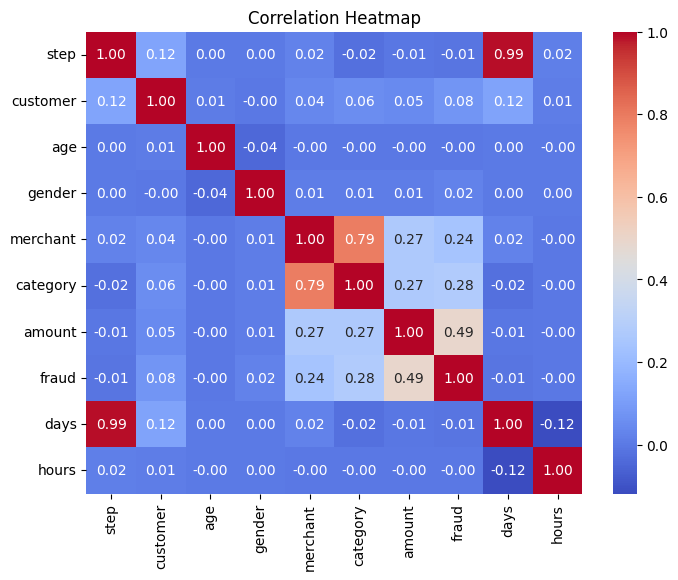

In [12]:
customer_mapping=[]
category_mapping=[]
merchant_mapping=[]

def get_df_with_dict_encoding(df):
    # Define a function to clean and convert the 'age' column
    global customer_mapping,category_mapping,merchant_mapping
    
    def clean_and_convert_age(age_str):
        age_str = age_str.replace("'", '')  # Remove single quotes
        age_str = age_str.replace('U', '-1')  # Replace 'U' with '-1'
        return int(age_str)  # Convert to integer
    
    # Apply the function to the 'age' column
    df['age'] = df['age'].apply(clean_and_convert_age)
    
    # Get the unique values in the 'customer' column
    unique_customers = df['customer'].unique()
    
    # Create a dynamic mapping dictionary
    customer_mapping = {customer: int(idx) for idx, customer in enumerate(unique_customers)}
    
    # Replace the 'customer' column with the float values
    df['customer'] = df['customer'].map(customer_mapping)
    
    # Get the unique values in the 'category' column
    unique_categories = df['category'].unique()
    
    # Create a dynamic mapping dictionary
    category_mapping = {category: int(idx) for idx, category in enumerate(unique_categories)}
    
    # Replace the 'category' column with the float values
    df['category'] = df['category'].map(category_mapping)
    
    # Get the unique values in the 'category' column
    unique_merchants = df['merchant'].unique()
    
    # Create a dynamic mapping dictionary
    merchant_mapping = {merchant: int(idx) for idx, merchant in enumerate(unique_merchants)}
    
    # Replace the 'merchant' column with the float values
    df['merchant'] = df['merchant'].map(merchant_mapping)

    # Get the unique values in the 'gender' column
    unique_gender = df['gender'].unique()
    
    # Create a dynamic mapping dictionary
    gender_mapping = {gender: int(idx) for idx, gender in enumerate(unique_gender)}
    
    # Replace the 'merchant' column with the float values
    df['gender'] = df['gender'].map(gender_mapping)
    
    #drop unused features
    df.drop(["zipMerchant","zipcodeOri"],axis=1,inplace=True)
    
    # Feature eng.
    df['days'] = df['step'] // 24  # Calculate days
    df['hours'] = df['step'] % 24   # Calculate remaining hours

    return df

    
df_with_dict_encoding=get_df_with_dict_encoding(org_df.copy())
correlation_matrix = df_with_dict_encoding.corr()
print(correlation_matrix['fraud'])
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

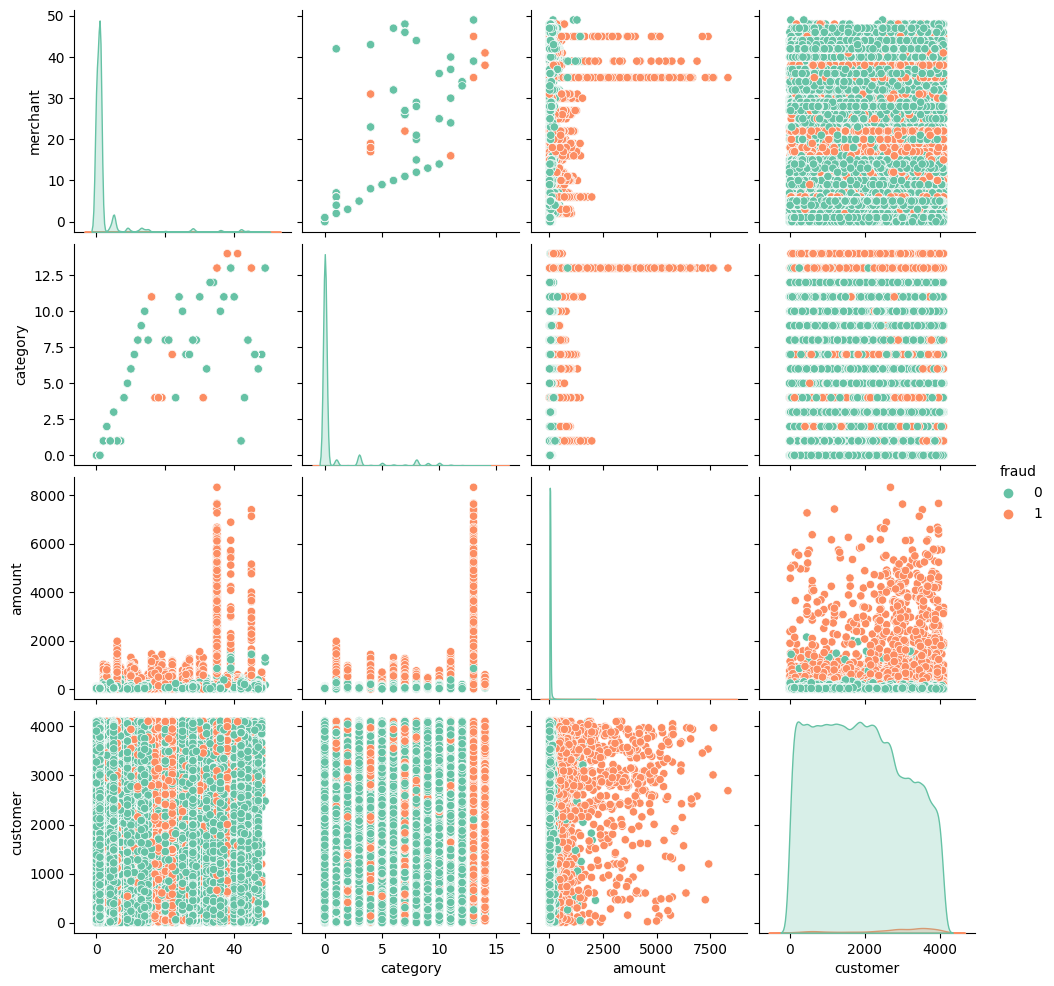

In [13]:
g = sns.pairplot(df_with_dict_encoding[["merchant",'category',"amount","fraud",'customer']], hue="fraud", palette="Set2", diag_kind="kde", height=2.5)

In [14]:
def find_fraud_count_per_col(df, col, mapping):
    # Map the first column based on the provided mapping dictionary
    if len(mapping) != 0 :
        df[col] = df[col].map({v: k for k, v in mapping.items()})

    # Unique categories
    unique_categories = df[col].unique()
    
    # Initialize a dictionary to store counts for each category
    category_counts = []
    
    # Iterate through unique categories and count rows where 'fraud' is 1
    for category in unique_categories:
        count_rows_benign = len(df[(df['fraud'] == 0) & (df[col] == category)])
        count_rows_fraud  = len(df[(df['fraud'] == 1) & (df[col] == category)])
        fraud_percentage=count_rows_fraud/(count_rows_benign+count_rows_fraud)*100
        total_rows_per_category=(count_rows_benign+count_rows_fraud)
        category_counts.append([category,total_rows_per_category ,count_rows_benign, count_rows_fraud,fraud_percentage])
        
    # Print the counts for each category
    category_counts = pd.DataFrame(category_counts, columns=[col, '#total',"#benign", "#fraud","%fraud"]).sort_values(by=["%fraud",'#total',"#fraud","#benign"], ascending=False)
    
    return category_counts


In [32]:
# Use the function with the category_mapping dictionary
find_fraud_count_per_col(df_with_dict_encoding.copy(), 'category', category_mapping).to_csv("category_stat.csv",index=False)

In [33]:
# Use the function with the merchant_mapping dictionary
find_fraud_count_per_col(df_with_dict_encoding.copy(), 'merchant', merchant_mapping).to_csv("merchant_stat.csv",index=False)

In [34]:
# Use the function with the customer_mapping dictionary
find_fraud_count_per_col(df_with_dict_encoding.copy(), 'customer', customer_mapping).to_csv("customer_stat.csv",index=False)

In [35]:
# Use the function with step col
find_fraud_count_per_col(df_with_dict_encoding.copy(), 'step', []).to_csv("step_stat.csv",index=False)

In [36]:
# Use the function with days col
find_fraud_count_per_col(df_with_dict_encoding.copy(), 'days', []).to_csv("days_stat.csv",index=False)

In [37]:
find_fraud_count_per_col(df_with_dict_encoding.copy(), 'amount', []).to_csv("amount_stat.csv",index=False)

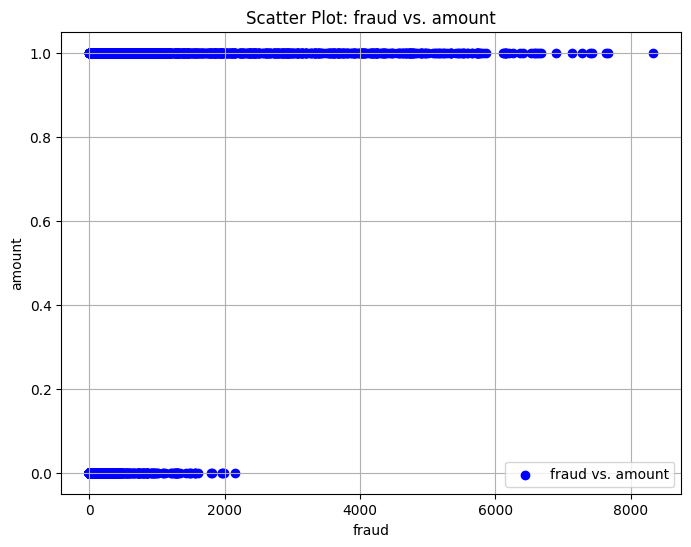

In [40]:
x_column = 'fraud'
y_column = 'amount'

# Create a scatter plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter( df_with_dict_encoding[y_column],df_with_dict_encoding[x_column], c='blue', marker='o', label=f'{x_column} vs. {y_column}')
plt.title(f'Scatter Plot: {x_column} vs. {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.legend()
plt.grid(True)
plt.show()

# TRAIN MODEL

In [20]:
df['fraud'].value_counts()

fraud
0    587443
1      7200
Name: count, dtype: int64

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import gc 

def f1_metric(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.round(y_pred), tf.float32)
    
    tp = tf.reduce_sum(y_true * y_pred)
    fp = tf.reduce_sum((1 - y_true) * y_pred)
    fn = tf.reduce_sum(y_true * (1 - y_pred))
    
    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())
    
    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    
    return f1

def create_seq_model(input_shape, optimizer,architecture):
    gc.collect()
    model = keras.Sequential()
    model.add(layers.Input(shape=input_shape))

    # Add hidden layers based on the architecture dictionary
    for layer_units, activation in architecture:
        model.add(layers.Dense(layer_units, activation=activation))

    # Add the output layer for binary classification
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile the model with the specified optimizer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[f1_metric])

    return model


# Define a function to create a unique model with various architectures
def create_models(X_train):
    architectures = [
    [(64, 'relu')],
    [(64, 'selu')],
    [(64, 'gelu')],
    [(64, 'relu'), (16, 'relu')],
    # Add more architectures as needed
    ]

    # Define a list of optimizers to loop through
    optimizers = ['adamw','adam', 'Adafactor']

    # Initialize an empty list to store the models
    models = []

    # Example usage:
    input_shape = X_train.shape[1]  # Replace with the actual input shape

    # Generate models with different architectures and optimizers using nested loops
    for architecture in architectures:
        for optimizer_name in optimizers:
            for lr in [0.001,0.0015]:
                optimizer = (
                    keras.optimizers.Adam(learning_rate=lr) if optimizer_name == 'adam' else
                    #keras.optimizers.Lion(learning_rate=lr) if optimizer_name == 'lion' else##################
                    keras.optimizers.AdamW(learning_rate=lr) if optimizer_name == 'adamw' else
                    keras.optimizers.Adafactor(learning_rate=lr)
                )
                model = create_seq_model(input_shape, optimizer,architecture)
                models.append((model,[architecture,optimizer_name,lr]))
    
    print(f"created {len(models)} models.........")
    return models 


In [ ]:
# Dense layers 
best_models = {}
batch_num=32

X = df_with_dict_encoding.drop(columns=['fraud'])
y = df_with_dict_encoding['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 
for model,model_description in create_models(X_train):
            history = model.fit(X_train, y_train, epochs=5, batch_size=batch_num, validation_data=(X_test, y_test))
            # Make predictions on the test data
            y_pred = model.predict(X_test)
            y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
            # Calculate the F1 score
            f1 = f1_score(y_test, y_pred_binary)
            # Print the F1 score
            print(f'{model_description}: F1 Score: {f1:.4f}')

[LightGBM] [Info] Number of positive: 5783, number of negative: 469931
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 872
[LightGBM] [Info] Number of data points in the train set: 475714, number of used features: 80
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.012156 -> initscore=-4.397663
[LightGBM] [Info] Start training from score -4.397663
Best F1-score for LightGBM: LGBMClassifier(random_state=42): 0.8371226239284383
Learning rate set to 0.143272
0:	learn: 0.3542936	total: 175ms	remaining: 2m 54s
1:	learn: 0.1762510	total: 212ms	remaining: 1m 45s
2:	learn: 0.0988731	total: 245ms	remaining: 1m 21s
3:	learn: 0.0632119	total: 279ms	remaining: 1m 9s
4:	learn: 0.0443621	total: 312ms	remaining: 1m 2s
5:	learn: 0.0349464	total: 345ms	remaining: 57.2s
6:	learn: 0.0290104	total: 37

C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best F1-score for Logistic Regression: LogisticRegression(random_state=42): 0.7546391752577319
Best F1-score for KNN: KNeighborsClassifier(): 0.7082997582594682
Best F1-score for Decision Tree: DecisionTreeClassifier(random_state=42): 0.759679107080572
Best F1-score for Gaussian Naive Bayes: GaussianNB(): 0.36851754845468826
Best F1-score for Linear Discriminant Analysis: LinearDiscriminantAnalysis(): 0.7050736497545007
Best F1-score for Extra Trees: ExtraTreesClassifier(random_state=42): 0.8037243947858473
Best F1-score for Bagging: BaggingClassifier(random_state=42): 0.8146174343357442


,name,best_estimator,F1-Score,ROC
2,XGBoost,"XGBClassifier(base_score=None, booster=None, c...",0.841716,0.900919
0,LightGBM,LGBMClassifier(random_state=42),0.837123,0.895651
5,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.832644,0.890040
1,CatBoost,<catboost.core.CatBoostClassifier object at 0x...,0.828869,0.892416
12,Bagging,(DecisionTreeClassifier(random_state=195292617...,0.814617,0.876963
11,Extra Trees,"(ExtraTreeClassifier(random_state=1608637542),...",0.803724,0.879930
8,Decision Tree,DecisionTreeClassifier(random_state=42),0.759679,0.882727
6,Logistic Regression,LogisticRegression(random_state=42),0.754639,0.822470
7,KNN,KNeighborsClassifier(),0.708300,0.809371
10,Linear Discriminant Analysis,LinearDiscriminantAnalysis(),0.705074,0.877641


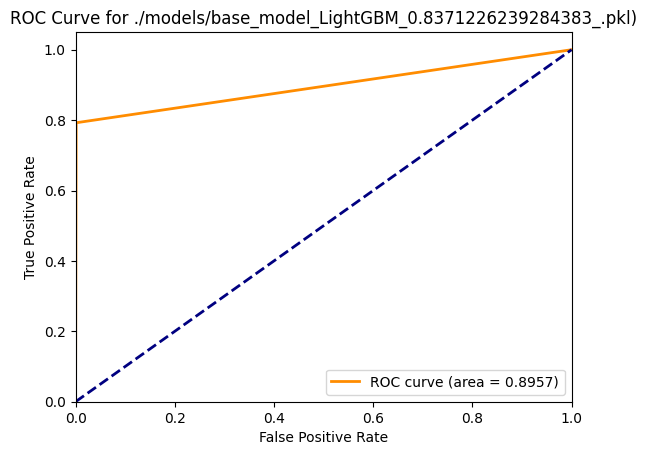

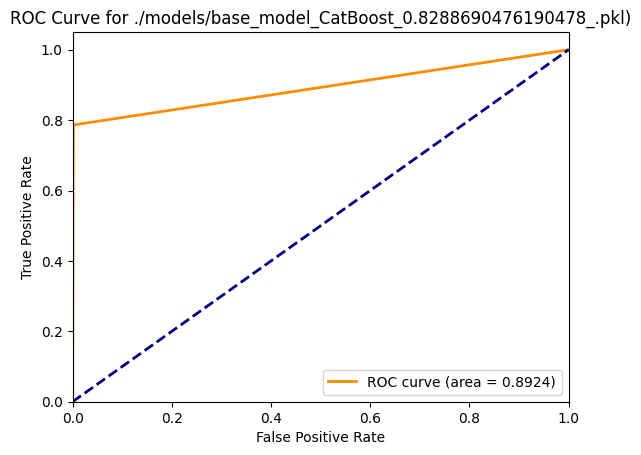

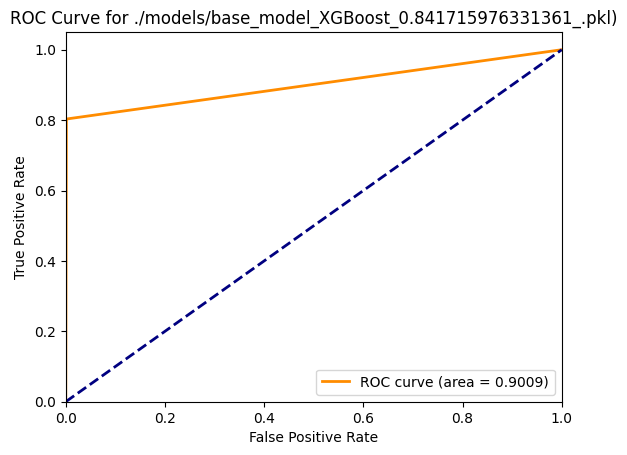

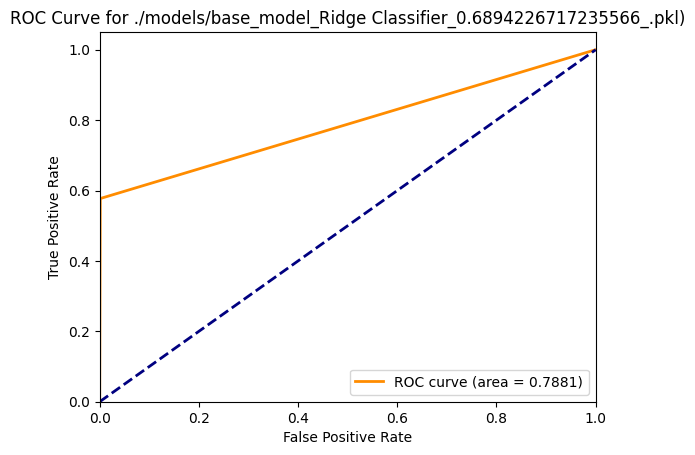

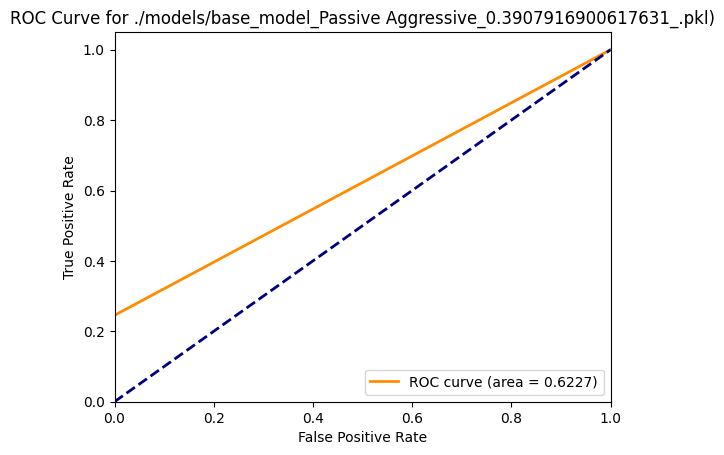

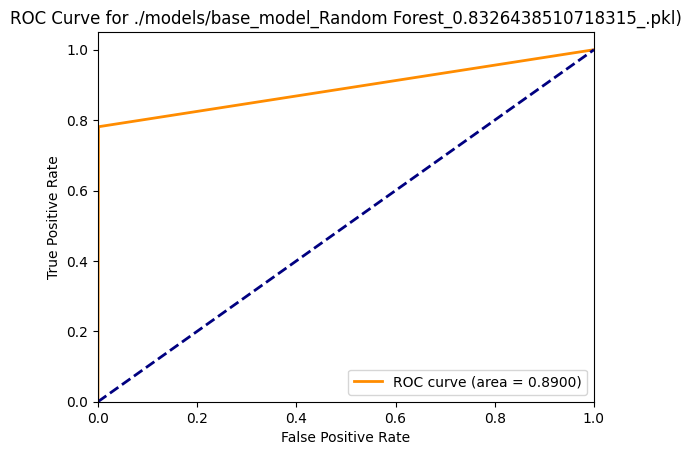

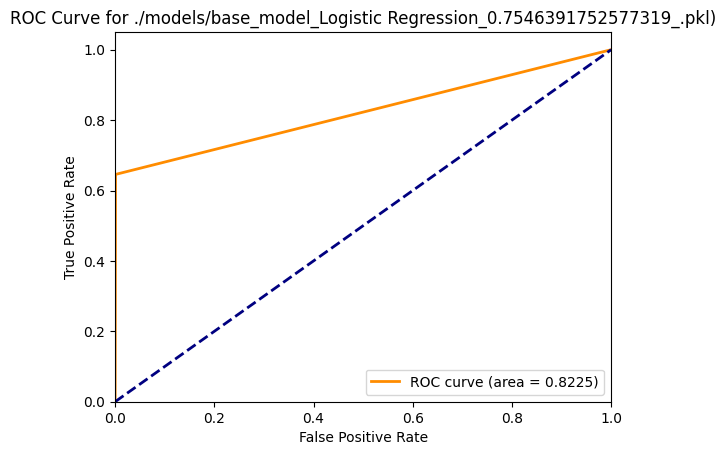

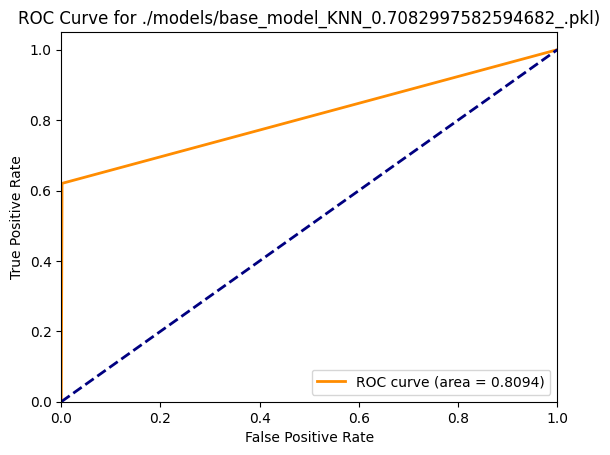

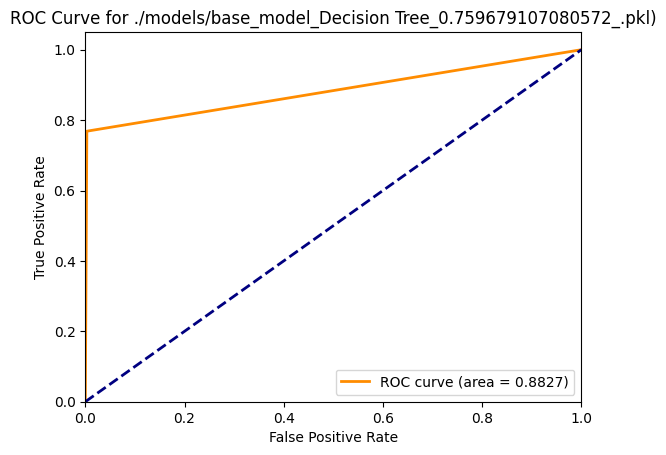

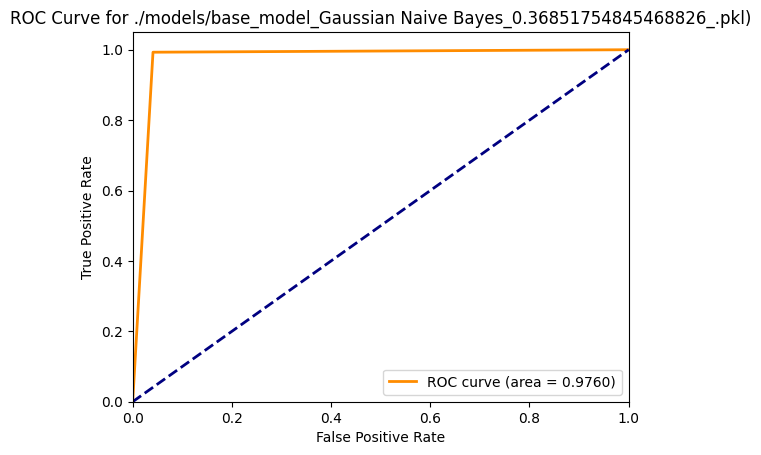

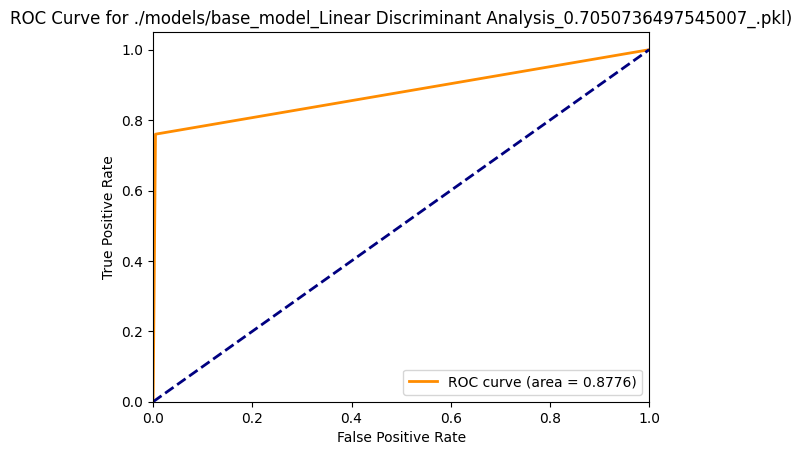

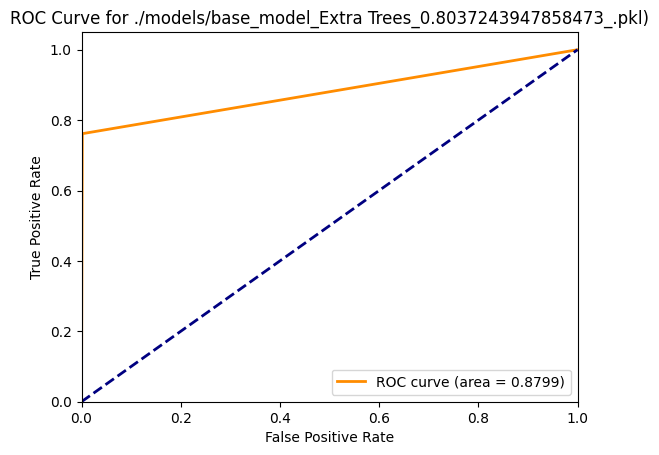

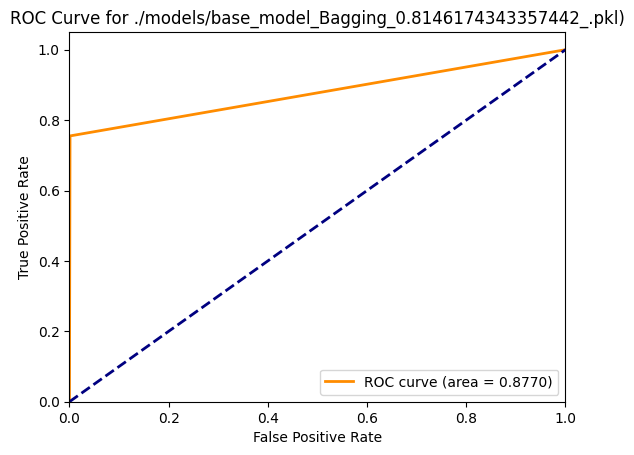

In [26]:
# Create a custom scoring function using F1-score
f1_scorer = make_scorer(f1_score)
results_list = []

X = df.drop(columns=['fraud'])
y = df['fraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define a list of classifiers to try
classifiers = [
       ("LightGBM", LGBMClassifier(random_state=42)),
       ("CatBoost", CatBoostClassifier(random_state=42)),
       ("XGBoost", XGBClassifier(random_state=42)),
       ("Ridge Classifier", RidgeClassifier(random_state=42)),
       ("Passive Aggressive", PassiveAggressiveClassifier(random_state=42)),
       ("Random Forest", RandomForestClassifier( random_state=42)),
       ("Logistic Regression", LogisticRegression(random_state=42)),
       ("KNN", KNeighborsClassifier()),
       ("Decision Tree", DecisionTreeClassifier(random_state=42)),
       ("Gaussian Naive Bayes", GaussianNB()),
       ("Linear Discriminant Analysis", LinearDiscriminantAnalysis()),
       ("Extra Trees", ExtraTreesClassifier(random_state=42)),
       ("Bagging", BaggingClassifier(random_state=42)),
       
]

# Loop through classifiers, train, and evaluate
for name, clf in classifiers:
         clf.fit(X_train, y_train)
         y_pred = clf.predict(X_test)
         
         f1 = f1_score(y_test, y_pred)
         print(f"Best F1-score for {name}: {clf}: {f1}")
        

         model_name = f"./models/base_model_{name}_{f1}_.pkl"
         joblib.dump(clf, model_name)

         # Calculate ROC curve and AUC
         fpr, tpr, _ = roc_curve(y_test, y_pred)
         roc_auc = auc(fpr, tpr)
         # Plot ROC curve
         plt.figure()
         plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.4f})'.format(roc_auc))
         plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
         plt.xlim([0.0, 1.0])
         plt.ylim([0.0, 1.05])
         plt.xlabel('False Positive Rate')
         plt.ylabel('True Positive Rate')
         plt.title(f'ROC Curve for {model_name})')
         plt.legend(loc='lower right')
         plt.savefig(f'./figures/base_model_ROC_{name}_{roc_auc}.png')

         results_list.append([name, clf, f1,roc_auc])
        
         gc.collect()
df_base_results=pd.DataFrame(results_list,columns=['name','best_estimator','F1-Score','ROC']).sort_values(by="F1-Score", ascending=False)
df_base_results

In [27]:
df_base_results

,name,best_estimator,F1-Score,ROC
2,XGBoost,"XGBClassifier(base_score=None, booster=None, c...",0.841716,0.900919
0,LightGBM,LGBMClassifier(random_state=42),0.837123,0.895651
5,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.832644,0.890040
1,CatBoost,<catboost.core.CatBoostClassifier object at 0x...,0.828869,0.892416
12,Bagging,(DecisionTreeClassifier(random_state=195292617...,0.814617,0.876963
11,Extra Trees,"(ExtraTreeClassifier(random_state=1608637542),...",0.803724,0.879930
8,Decision Tree,DecisionTreeClassifier(random_state=42),0.759679,0.882727
6,Logistic Regression,LogisticRegression(random_state=42),0.754639,0.822470
7,KNN,KNeighborsClassifier(),0.708300,0.809371
10,Linear Discriminant Analysis,LinearDiscriminantAnalysis(),0.705074,0.877641


## Fine-tuning BEST 3 MODELS with :
* Scale numerical feature
* Imbalance techniques

In [28]:
selected_models=df_base_results['name'].to_list()[:3]
selected_models

['XGBoost', 'LightGBM', 'Random Forest']

Grid search for Random Forest
Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best F1-score for Original : Random Forest : RandomForestClassifier(min_samples_split=5): 0.8376647834274953
Grid search for XGBoost
Fitting 2 folds for each of 18 candidates, totalling 36 fits
Best F1-score for Original : XGBoost : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200,

C:\Users\Moham\AppData\Local\Temp\ipykernel_12088\3732379230.py:140: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Grid search for Random Forest
Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best F1-score for RandomUndersampling : Random Forest : RandomForestClassifier(min_samples_split=5): 0.9761580381471391
Grid search for XGBoost
Fitting 2 folds for each of 18 candidates, totalling 36 fits
Best F1-score for RandomUndersampling : XGBoost : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=N

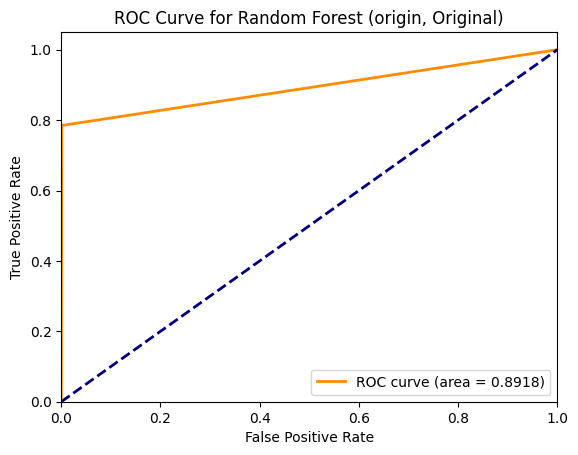

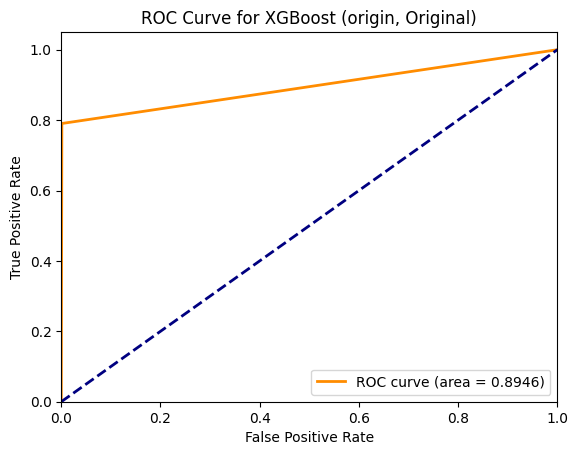

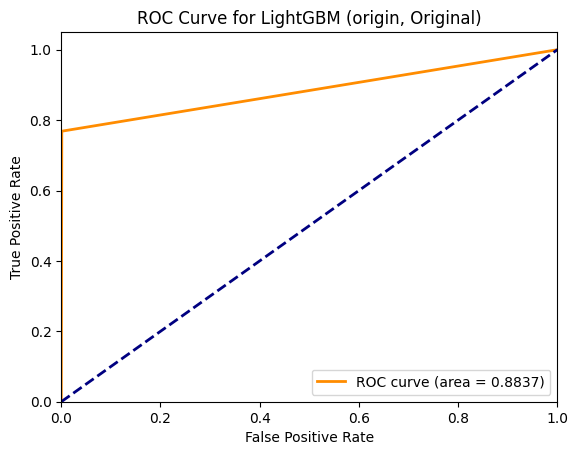

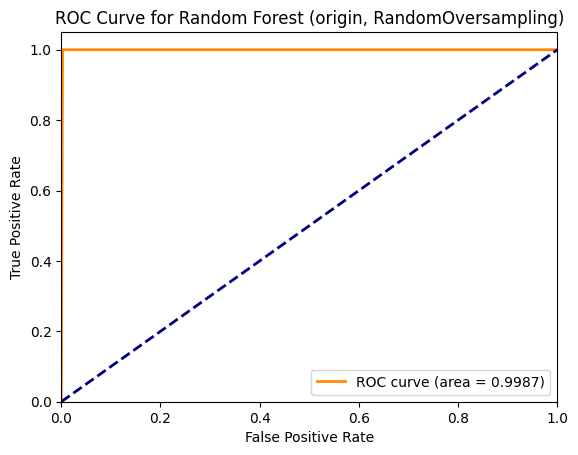

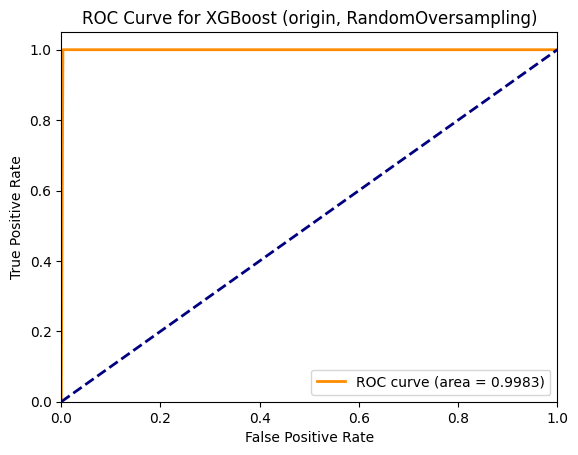

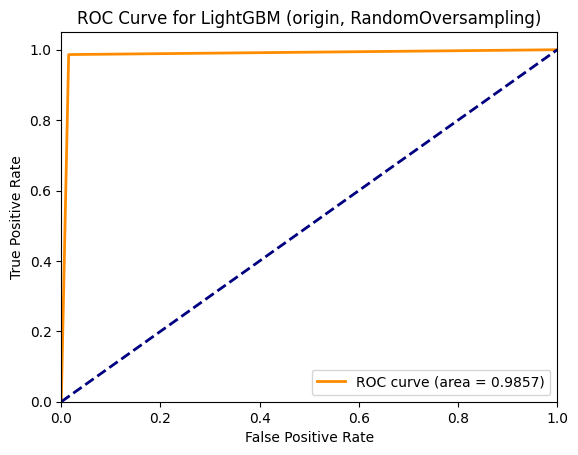

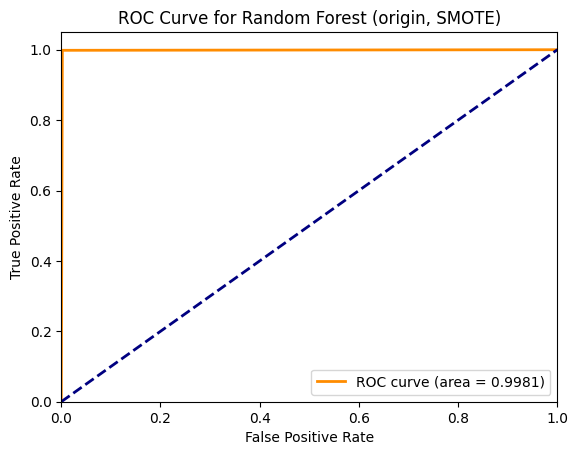

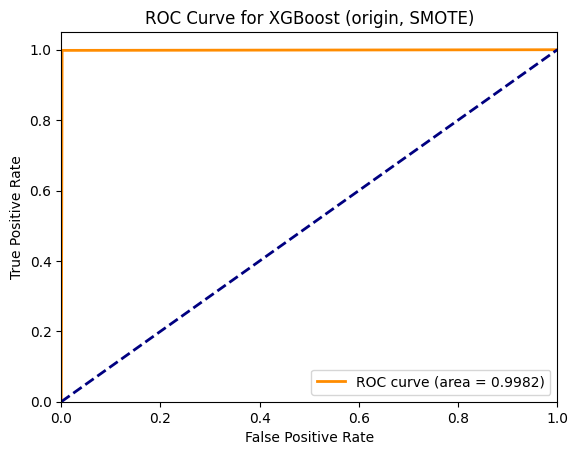

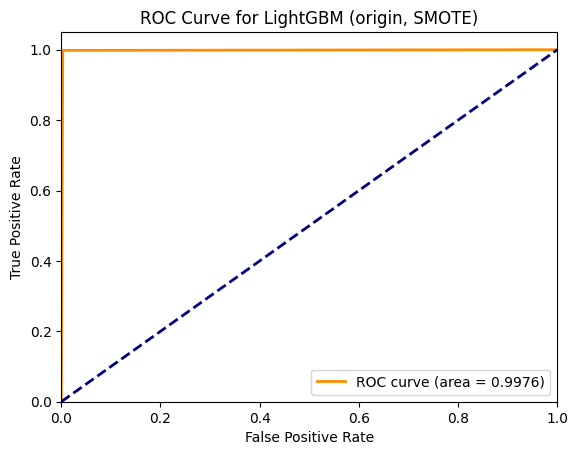

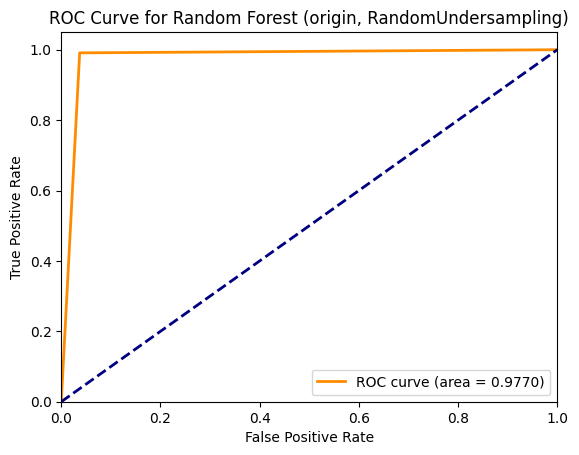

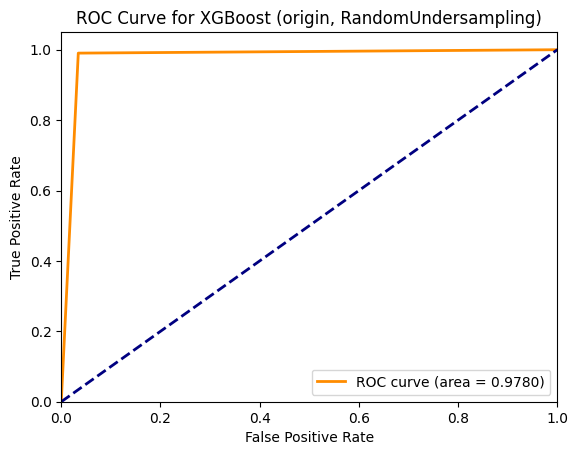

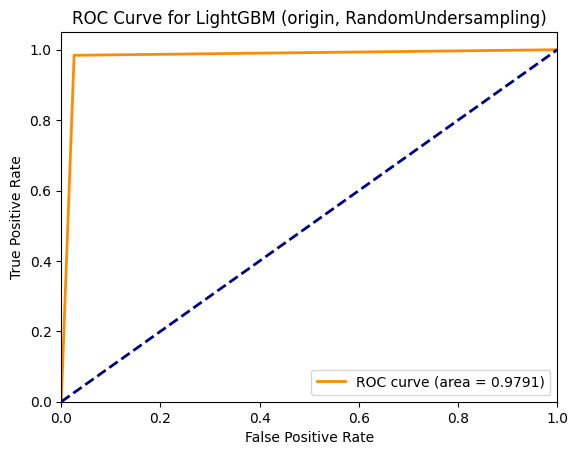

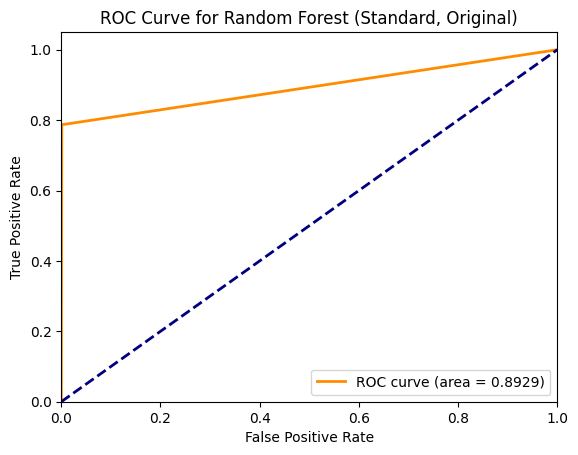

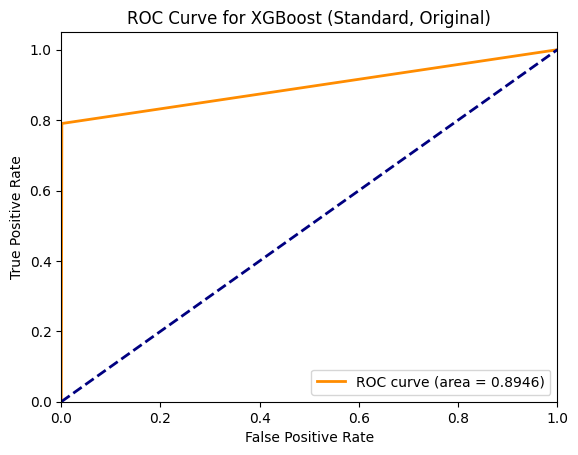

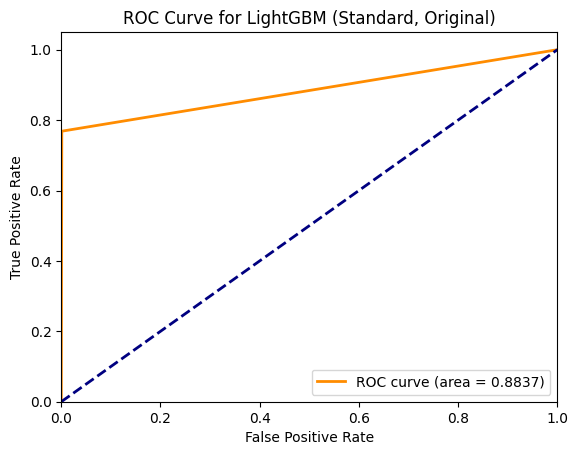

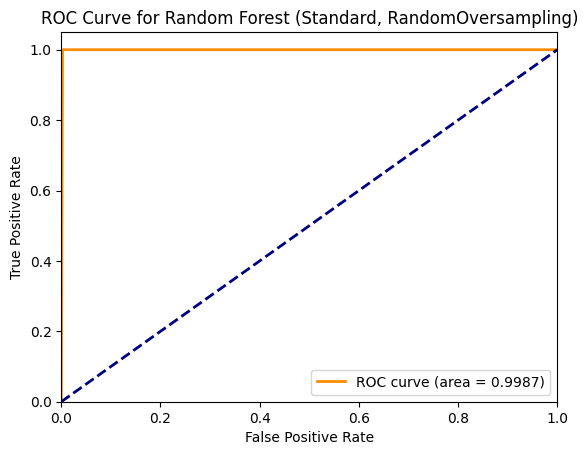

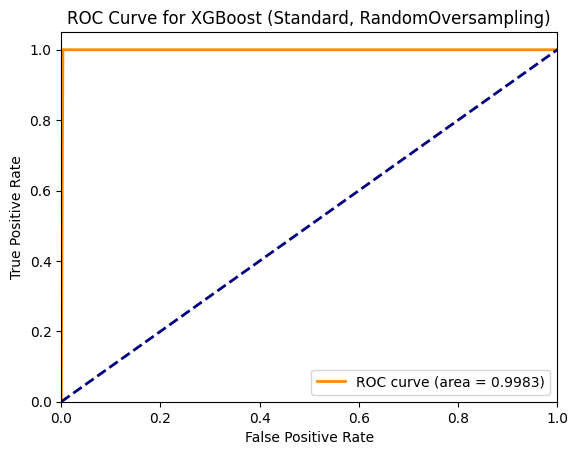

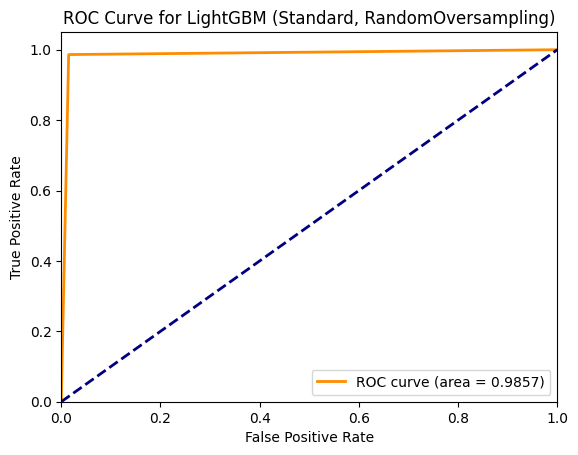

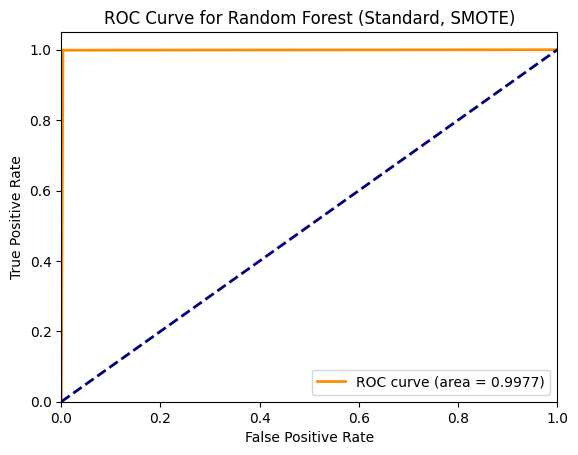

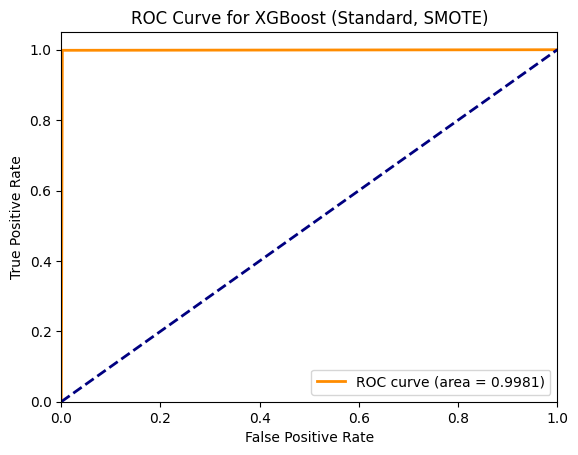

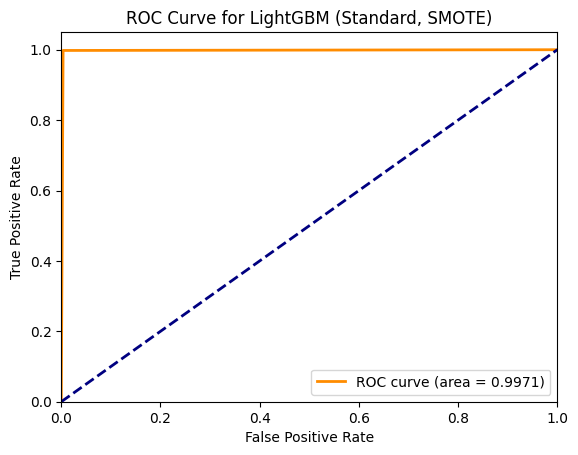

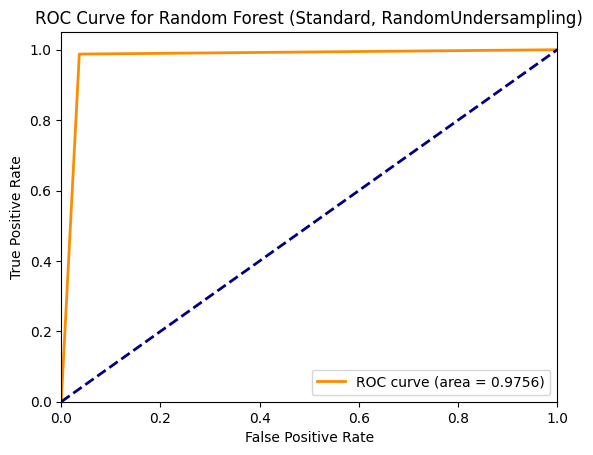

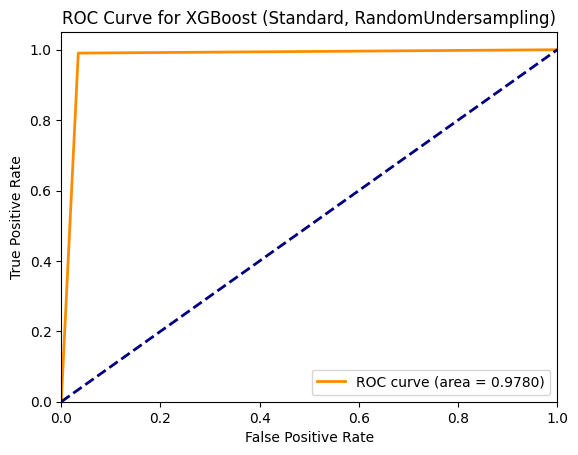

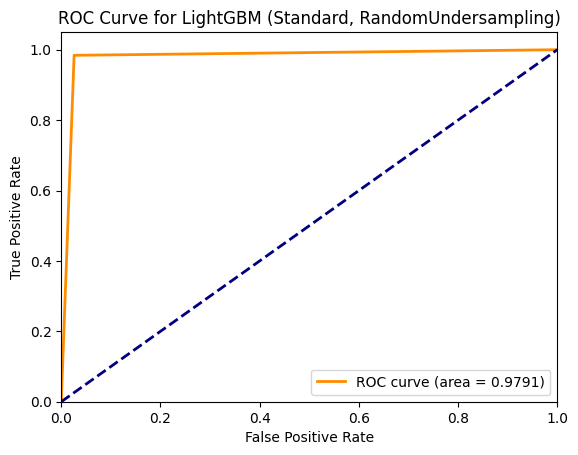

In [29]:
# Define the hyperparameters and their possible values for each classifier
param_grids = {
    'Extra Trees': {
        'model': ExtraTreesClassifier(),
        'param_grid': {
            'n_estimators': [200,300],
            'max_depth': [10],
            'min_samples_split': [2,5],
            'min_samples_leaf': [1, 2]
        }
    },
    
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10],
            'min_samples_split': [2,5],
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(),
        'param_grid': {
            'C': [0.1, 1],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [None, 10],
            'min_samples_split': [2, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'XGBoost': {
        'model': xgb.XGBClassifier(),
        'param_grid': {
            'n_estimators': [200],
            'max_depth': [3,6,9],
            'learning_rate': [ 0.1, 0.3,0.5],
            'subsample': [0.8, 1.0],
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(),
        'param_grid': {
            'iterations': [100, 200],
            'depth': [4, 8],
            'learning_rate': [0.01, 0.1, 0.3],
        }
    },
    'LightGBM': {
        'model': lgb.LGBMClassifier(),
        'param_grid': {
            'n_estimators': [100, 200],
            'max_depth': [3,  5],
            'learning_rate': [0.1, 0.3],
        }
    }
}

# sampling techniques
sampling_techniques = {
    'Original': None,
    'RandomOversampling': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'RandomUndersampling': RandomUnderSampler(random_state=42)
}


# Create a custom scoring function using F1-score
f1_scorer = make_scorer(f1_score)
results_list = []

# Perform grid search for each classifier
best_models = {}

df_2=df.copy()
for normalize in ["origin",'Standard',]:# 'MinMax'
    # Scale numerical feature: Consider the distribution of 'amount' column. If it's highly skewed or contains outliers, scaling might help the algorithm better handle the data. Standardization can be robust against outliers, while normalization might amplify their impact.
    df=df_2.copy()
    
    if normalize=="origin":
        df['amount']=org_df['amount']
    elif normalize=="origin":
        scaler = StandardScaler()
        df['amount'] = scaler.fit_transform(df[['amount']])
    else:
        scaler = MinMaxScaler()
        df['amount'] = scaler.fit_transform(df[['amount']])

    for sampling_name, sampler in sampling_techniques.items():
        X = df.drop(columns=['fraud'])
        y = df['fraud']
        
        if sampler is not None:
            X_resampled, y_resampled = sampler.fit_resample(X, y)
        else:
            X_resampled, y_resampled = X, y

        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

        
        for model_name, params in param_grids.items():
            if model_name not in selected_models:
                continue
            print(f"Grid search for {model_name}")
            grid_search = GridSearchCV(estimator=params['model'], param_grid=params['param_grid'],
                                       scoring=f1_scorer, cv=2, verbose=2, n_jobs=-1)
            grid_search.fit(X_train, y_train)
            best_models[model_name] = grid_search.best_estimator_
        
            # Evaluate the best model on the test data
            y_pred = grid_search.best_estimator_.predict(X_test)
            f1 = f1_score(y_test, y_pred)
            print(f"Best F1-score for {sampling_name} : {model_name} : {best_models[model_name]}: {f1}")

            


            # Save the trained model
            model_filepath = f'./models/{model_name}_{normalize}_{sampling_name}_model.pkl'
            joblib.dump(grid_search.best_estimator_, model_filepath)

            # Calculate ROC curve and AUC
            fpr, tpr, _ = roc_curve(y_test, y_pred)
            roc_auc = auc(fpr, tpr)

            # Plot ROC curve
            plt.figure()
            plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.4f})'.format(roc_auc))
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve for {model_name} ({normalize}, {sampling_name})')
            plt.legend(loc='lower right')
            plt.savefig(f'./figures/ROC_{model_name}_{normalize}_{sampling_name}_{roc_auc}.png')

            # save the model result in list
            results_list.append([sampling_name,normalize,model_name, f1,roc_auc, best_models[model_name]])
        
    
# Sort the DataFrame by the F1-score column in descending order
results_df=pd.DataFrame(results_list,columns=['sampling_name','normalize type','Model', 'F1-Score','ROC',"best_estimator"])
results_df = results_df.sort_values(by='F1-Score', ascending=False)

# Print the sorted results
print("Sorted Results:")
print(results_df)

In [30]:
results_df

,sampling_name,normalize type,Model,F1-Score,ROC,best_estimator
15,RandomOversampling,Standard,Random Forest,0.998728,0.998729,"(DecisionTreeClassifier(max_features='sqrt', m..."
3,RandomOversampling,origin,Random Forest,0.998715,0.998716,"(DecisionTreeClassifier(max_features='sqrt', m..."
16,RandomOversampling,Standard,XGBoost,0.998345,0.998346,"XGBClassifier(base_score=None, booster=None, c..."
4,RandomOversampling,origin,XGBoost,0.998345,0.998346,"XGBClassifier(base_score=None, booster=None, c..."
7,SMOTE,origin,XGBoost,0.998189,0.998191,"XGBClassifier(base_score=None, booster=None, c..."
19,SMOTE,Standard,XGBoost,0.998079,0.998081,"XGBClassifier(base_score=None, booster=None, c..."
6,SMOTE,origin,Random Forest,0.998070,0.998072,"(DecisionTreeClassifier(max_features='sqrt', r..."
18,SMOTE,Standard,Random Forest,0.997689,0.997690,"(DecisionTreeClassifier(max_features='sqrt', r..."
8,SMOTE,origin,LightGBM,0.997556,0.997558,"LGBMClassifier(learning_rate=0.3, max_depth=5)"
20,SMOTE,Standard,LightGBM,0.997131,0.997133,"LGBMClassifier(learning_rate=0.3, max_depth=5)"


In [31]:
results_df.to_csv("training_results.csv",index=False)